In [ ]:

import cv2
import matplotlib.pyplot as plt
import sys

img = cv2.imread('image2.JPG')    # Reading an image in BGR

if img is None:
  sys.exit("COuld not read the image!")

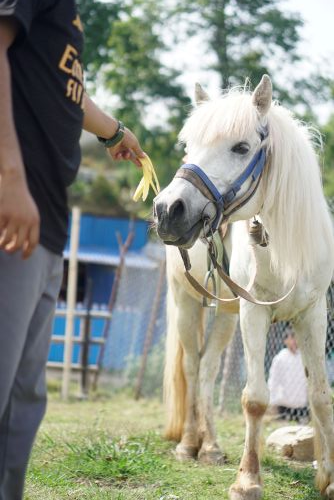

In [ ]:

from google.colab.patches import cv2_imshow

cv2_imshow(img)

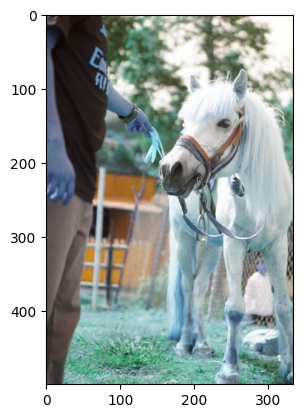

In [ ]:
plt.imshow(img)    # displaying the BGR image with matplotlib

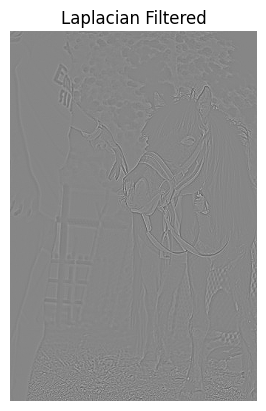

In [ ]:
#multiplying image with laplace

import numpy as np
from scipy.signal import convolve2d

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define Laplacian kernel
laplace_kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])

# Apply convolution
laplacian_filtered = convolve2d(gray_image, laplace_kernel, mode='same', boundary='symm')

plt.imshow(laplacian_filtered, cmap='gray')
plt.title("Laplacian Filtered")
plt.axis('off')
plt.show()


In [ ]:
print(gray_image.shape)

(500, 334)


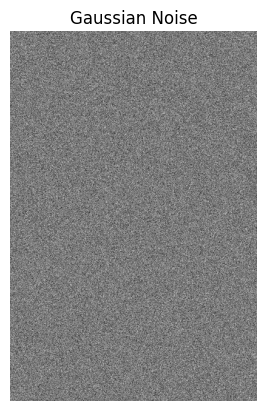

In [ ]:
#Add noise to image

#Gaussian Noise adding

def add_gaussian_noise(image, mean=0, std=20):
    gauss = np.random.normal(mean, std, image.shape).astype('float32')
    plt.imshow(gauss)
    noisy = image.astype('float32') + gauss
    return gauss
    return np.clip(noisy, 0, 255).astype('uint8')

gaussian_noisy = add_gaussian_noise(gray_image)

plt.imshow(gaussian_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')
plt.show()



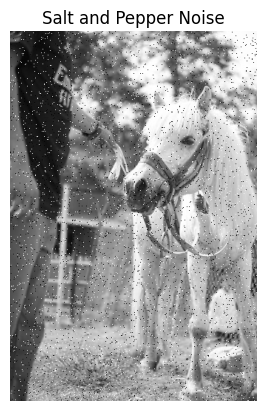

In [ ]:
#salt and pepper noise

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = image.copy()
    total_pixels = image.size

    # Salt
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255

    # Pepper
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0

    return noisy

sp_noisy = add_salt_pepper_noise(gray_image)

plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt and Pepper Noise")
plt.axis('off')
plt.show()


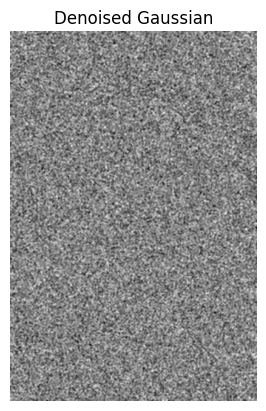

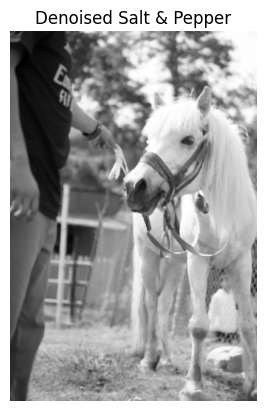

In [ ]:
#removing gaussian noise using gaussian blur
gaussian_denoised = cv2.GaussianBlur(gaussian_noisy, (3, 3), 1)

plt.imshow(gaussian_denoised, cmap='gray')
plt.title("Denoised Gaussian")
plt.axis('off')
plt.show()

#removing salt and pepper noise using median blur
sp_denoised = cv2.medianBlur(sp_noisy, 3)

plt.imshow(sp_denoised, cmap='gray')
plt.title("Denoised Salt & Pepper")
plt.axis('off')
plt.show()

In [ ]:
# sobel

xsobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
ysobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])



def convolution2d(image, kernel):

  image_height = image.shape[0]
  image_width = image.shape[1]
  kernel_height = kernel.shape[0]
  kernel_width = kernel.shape[1]
  pad_height = kernel_height // 2
  pad_width = kernel_width // 2

  output = np.zeros((image_height, image_width))              # Initialize the output image

  padded = np.pad(image,((pad_height, pad_height), (pad_width, pad_width)), mode = 'constant')   # paddded on ((up,down),(left,right))

  for i in range(image_height):
    for j in range(image_width):
      patch = padded[i: i+kernel_height, j: j+kernel_width]                                      # image patch extracted (in the next inner loop slide the patch rightwards by stride = 1) (In the outer loop, patch slides downward by 1) (combined loop gives patch size = kernel size)

      output[i,j] = np.sum(patch * kernel)                                                      # Convolution sum

  return output

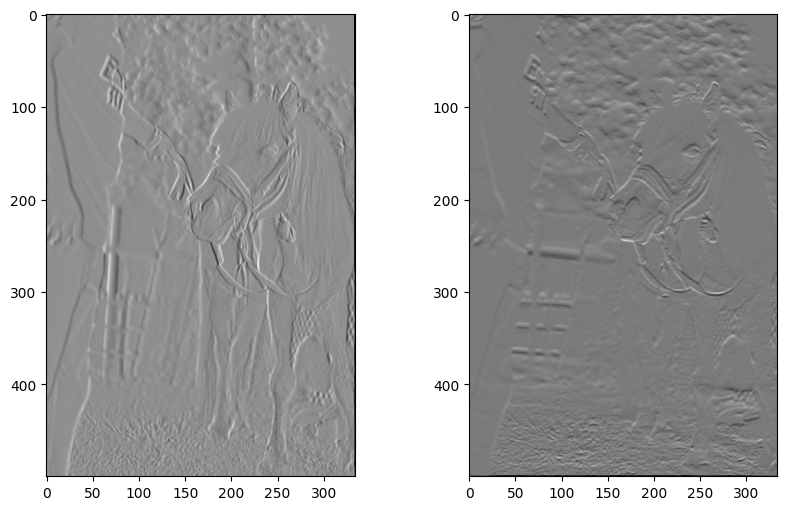

In [ ]:
xsobel_output = convolution2d(gray_image, xsobel)      # edge detection in x axis
ysobel_output = convolution2d(gray_image, ysobel)


plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(xsobel_output, cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(ysobel_output, cmap = 'gray')